In [1]:
import tensorflow as tf

## Model (모델)

> 텐서들을 가지고 연산 및 예측을 수행하는 객체를 `model`이라고 한다.  

모델은 두가지의 일을 수행한다.

- 텐서간 연산을 통한 결과값 도출 (forward pass)
- 학습을 통한 가중치 갱신 (backward pass)

모델은 데이터를 통해 문제를 해결하기 위한 하나의 방법입니다.  
예를 들어 분류문제를 생각해봅시다.  

모델의 학습은 주어지는 데이터 내에서 '패턴'을 찾는 것입니다. 

'패턴'이라는 것은 분류 문제의 경우, 각 카테고리의 공통점이자 카테고리를 구분할 수 있는 차이점을 의미하게 된다.


우리가 찾아둔 패턴을 저장해두는 것이 바로 Layer입니다.  


딥러닝에서의 모델은 데이터를 처리하는 과정에서 여러개의 layer들로 구성되기 때문에 모델을 구현하기 전에 layer를 구현하는 것이 먼저 선행되어야한다.

<img src="./education_images/cnn_structure.png" alt="Drawing" style="width: 700px;"/>

# Layer

> 재사용이 가능하며, 훈련이 가능한 변수들로 이루어진 수학적 구조를 말한다.   

- 단순히 입력에 대한 처리(연산)를 진행하고 그 결과를 출력하기 때문에 하나의 함수로 볼 수 있다.  


예를 들어, 고양이와 개 사진을 입력으로 받고, 최종적으로 해당 이미지가 개인지 고양이인지를 분류하는 모델을 만든다. 

이 때, 각 특징들을 저장하는 곳이 layer라고 하였다. 각각의 layer는 개 이미지와 고양이 이미지들의 특징들을 담고 있다. 

어떤 layer는 귀의 형태를 가지고 있거나 또 어떤 layer는 털의 분포 이런식으로, 개와 고양이를 구별할 수 있는 특징들을 가지고 있습니다. 

결국 개인지 고양이인지 (0, 1) 이진 분류를 반환하는 것이 모델의 최종목표이다.

이미지라는 매우 복잡한 입력에서 (0, 1)이라는 매우 단순한 출력까지의 과정은 하나의 과정으로 이해하기 어려울 것입니다.

이 과정을 layer라는 연산 단위로 분할하여 각각의 단순한 연산의 연속으로 보게 된다면, 복잡한 문제도 단순한 연산의 연속으로 볼 수 있을 것입니다.

#### 개와 고양이 사진 (input)

#### -> 어떠한 layer는 귀의 형태를 보고 해당 이미지가 개인지 고양이인지 예측할 것(layer) 

#### -> 털의 분포를 보고 해당 이미지가 개인지 고양이인지 예측할 것(layer) 

#### -> .... 

#### -> 개와 고양이중 어떤 것인가? 

이 모든 과정이 모델이다. 그 속에 부분적인 예측을 하는 것이 layer이다.


- layer를 함수로 표현하게 되면 하나의 모델은 함수들의 연속, 합성함수로 볼 수 있게 될 것이다.

<img src="./education_images/1-1-1_formula.png" alt="Drawing" style="width: 400px;"/>

<img src="./education_images/1-1-2_graph.png" alt="Drawing" style="width: 300px;"/>

## 모델, layer 정리

우리가 구현해야하는 것은 모델이다.

모델은 복잡한 문제를 푸는 방법을 의미합니다.

복잡한 문제를 단순한 문제 여러 개로 보고자 한다.

개 - 고양이

이미지 -> 개인지 고양이인지 (복잡한 문제)

1. 귀의 특징을 파악한다. (쉬운 문제)
2. 털의 특징을 파악한다. (쉬운 문제)
3. ...

이렇게 특징을 파악하는 쉬운 문제들을 통해 최종적으로 어려운 문제를 해결하고자 하는 것이다. 

문제를 해결하는 전체 과정을 우리는 '모델', 부분적으로 쉬운 문제를 'layer'라고 한다. 

그러므로 layer를 tensorflow를 통해서 정의하는 방법을 설명하고자 한다.


tensorflow에서는  tf.Module 의 클래스를 상속받아 새로운 클래스를 생성하는 방식으로 layer를 구현한다.   

-  callable 객체이기 때문에 `__call__`을 내부적으로 구현해야한다.

https://docs.python.org/3/library/functions.html

- 이후 사용할 keras API 에서의 layer, model 또한 해당 객체의 하위 클래스이다.


가장 단순한 인공신경망 layer인 fully connected layer를 tensorflow로 구현해보자.   
코드로 구현하기 전, layer는 하나의 함수이기 때문에 입력과 출력의 형태와 어떠한 __연산__을 수행할 것 인가에 대해서 정의가 필요하다.

# fully-connected layer

완전 연결 레이어를 의미합니다. layer의 입력, 출력을 모두 연결하는 연산을 수행하는 레이어입니다.


<img src="./education_images/fullylayer.png" alt="Drawing" style="width: 400px;"/>

## 1. 입력과 출력의 shape 정의

layer의 입력, 출력 모두 텐서이다. (연산의 과정까지 모두 텐서이다.)   
텐서는 모두 shape, dtype이 정의되어야한다.
> 맨 앞 차원의 크기가 None인 것은 batch의 크기 때문이다.

<img src="./education_images/1-1-3_input.png" alt="Drawing" style="width: 250px;"/>


## 2. 연산식 정의


<img src="./education_images/1-1-4_formula.png" alt="Drawing" style="width: 300px;"/>

## (, 3) 차원의 의미

이전 텐서의 shape (2, )는 단순히 1개의 차원을 가진다는 의미입니다.

하지만 (,3)의 경우에는 1개의 차원을 가진다는 의미가 아닙니다. ([] , 3)에서 앞의 차원은 지정되지 않았지만 반드시 존재한다라는 의미이다.

(1, 3)이 될수도  (3000, 3) 될 수도 있다. 라는 의미입니다. 

차원이 정의가 되어 있지만 특정 값으로는 제한되어 있지 않다라고 해석할 수 있습니다.

In [3]:
tf.constant([1,2])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

In [4]:
# layer를 tensorflow로 구현하기 위해서는 tf.Module이라는 클래스를 상속받아 정의하여야 합니다.
class myLayer(tf.Module):
    pass

## 파이썬에서 클래스 복습

상속 : 상위 클래스의 메소드, 프로퍼티들을 하위 클래스가 사용할 수 있도록 하는 방식

메소드 : 클래스가 가지고 있는 함수

프로퍼티 : 클래스가 가지고 있는 변수 값

인스턴스 : 클래스를 통해 선언된 객체

객체를 오브젝트라고 하는데, 클래스를 통해 선언된 객체를 인스턴스라고 합니다.


상위 클래스 '새' 

하위 클래스 '오리'

하위 클래스 '독수리'

오리, 독수리는 새이다. 라고 볼 수 있습니다. 즉, 상속의 관계는 'is' 로 표현이 가능합니다.

오리는 새이다. duck is bird

독수리는 새이다. eagle is bird



### 클래스를 정의할 때, 반드시 __init__() 함수를 정의해야한다.

클래스를 사용하는 이유는 클래스를 통해서 인스턴스를 만들기 위함. 

클래스를 통해 선언되어지는 인스턴스들은 공통적인 의미 (프로퍼티, 메소드)를 가지고 있다.

붕어빵틀 - 붕어빵의 관계와 같이 동일한 객체를 만들기 위해 클래스를 사용합니다.

모든 객체가 선언될 때, 수행하는 함수가 바로 `__init__()` 함수 입니다. 

아까 callable 객체를 설명할 때, `__call__()` 살펴보았다. 

이 함수는 인스턴스 명이 my_instance일 때,  my_instance() 과 같이 코드를 수행하게 되면 __call__() 함수가 수행된다고 하였습니다.

동일하게 인스턴스가 선언될 때, `__init__()` 함수가 수행된다.

In [6]:
# 상위 클래스 새

class Bird():
    
    # property
    eye = '멀리 볼 수 있다.'
    wing = 2
    can_fly = True
    
    def __init__(self):
        print('나는 조류입니다.')
        
    # method
    def fly(self):
        print('펄럭')
        print('펄럭')


In [8]:
# 새로운 인스턴스 생성
new_bird = Bird()

# 인스턴스는 클래스의 프로퍼티를 가지고 있는가?
print(new_bird.eye)

print(new_bird.wing)

print(new_bird.can_fly)

나는 조류입니다.
멀리 볼 수 있다.
2
True


In [9]:
# 인스턴스는 클래스의 메소드를 가지고 있는가?

new_bird.fly()

펄럭
펄럭


In [13]:
# 클래스를 상속받는 하위 클래스

# Duck이라는 클래스는 Bird라는 클래스를 상속받을 것입니다.
class Duck(Bird):
    
    # property를 선언하지 않고 Bird클래스의 property를 사용할 수 있는가? 
    
    
    def __init__(self):
        
        # 하위 클래스의 __init__에서 상위 클래스(Bird)의 __init__함수를 호출해야한다. -> 반드시 사용하여야하므로 암기하듯이 외운다.
        super().__init__()
        
        
    # 하위 클래스가 상위 클래스의 메소드의 이름과 동일한 메소드를 정의할때 메소드 오버라이딩이 발생한다.
    # 하위 클래스에서의 메소드
    def fly(self):
        print('날 수 없음')
    

In [14]:
 # property를 선언하지 않고 Bird클래스의 property를 사용할 수 있는가? 
new_duck = Duck()

print(new_duck.eye)

print(new_duck.wing)

print(new_duck.can_fly)


나는 조류입니다.
멀리 볼 수 있다.
2
True


In [15]:
# 상속 받은 메소드와 동일한 이름의 메소드가 하위 클래스에도 있다면 하위 클래스의 메소드를 사용합니다.
new_duck.fly()

날 수 없음


## 3. 텐서플로우 구현

클래스 내에서 두가지의 함수를 정의하여 사용한다. 각 함수의 첫 번째 특징은 해당 함수를 정의해야하는 이유다.


### 3-1. `__init__`



- python에서 클래스를 정의할 때, 해당 클래스의 객체 생성시 호출되는 함수이다. -> 생성이 맞는말 선언

선언 이라는 의미는 new_duck = Duck()




- `super(self).__init__()` 을 통해서 상위클래스인 `tf.Module`객체를  생성한다.   
    → 상위 클래스 객체를 생성할 때, 상위클래스의 property, method를 사용할 수 있다.
    
    
    
- 클래스를 통해서 layer 객체를 생성하는 시점에 해당 함수가 호출된다.  


- 해당 layer에서 사용할 텐서 객체(변수, 상수, layer, 모델)등 을 선언하는 영역이다.(필수는 아니다.)  
    → Variable은 반드시 초기값이 필요한데, 모델을 생성하는 시점에 반드시 명시해줘야한다.




### 3-2. `__call__`

-  `tf.Module` 가 callable 객체이기 때문에 해당 함수를 오버라이딩 해야한다.  
    → 하위 클래스가 상위 클래스의 method를 재정의하여 사용하는 것을 오버라이딩이라고 한다.


- layer 객체를 호출하여 데이터를 입력받는 시점에 해당 함수가 호출된다. 


- 이 전에 `__init__` 에서 미리 선언해둔 텐서 객체들을 사용하여 수행할 연산을 정의한다. 

- `tf.random.normal()` 는 인자로 받는 shape에 정규분포를 따르는 난수로 채워진 텐서를 생성한다.


- `tf.ones()` 는 인자로 받는 shape에 모든 값을 1로 채운 텐서를 생성한다.


- 이외에 여러가지 initializer가 존재함.

<img src="./education_images/1-1-4_formula.png" alt="Drawing" style="width: 300px;"/>

In [16]:
tf.constant([[1, 2, 3]])

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [18]:
#초기값 선언을 위해 tf.ones() 
# 입력으로 받는 shape에 대해서 전부 1인 값을 가지는 텐서를 반환합니다.
tf.ones(shape = (3, 3))


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [23]:
# layer를 tensorflow로 구현하기 위해서는 tf.Module이라는 클래스를 상속받아 정의하여야 합니다.
class myLayer(tf.Module):
    
    # __init__을 정의합니다.
    def __init__(self):
        # tf.Module의 __init__()를 호출하여 tf.Module 클래스의 프로퍼티와 메소드를 사용하도록 하자.
        super().__init__()
        print('내가 만든 레이어가 생성되었습니다.')
        
        # 연산에 필요한 텐서들을 __init__에서 정의합니다. 
        # float32로 실수로 표현하는 이유는 X * W 가 행렬 연산이기 때문에 행렬연산의 경우에는 반드시 float형식을 사용해야한다.
        # 모든 텐서는 self. 것을 앞에 선언하여 해당 인스턴스가 사용할 수 있는 property로 선언합니다.
        self.X = tf.Variable([[1, 2, 3]], dtype = tf.float32, shape = (1,3), name= 'x')
        self.W = tf.Variable(tf.ones(shape = (3, 3)), name = 'w')
        self.b = tf.Variable(tf.ones(shape = (3)), name = 'b')
    
    def __call__(self):
        print('내가 만든 레이어의 연산이 수행됩니다.')
        # 정의된 텐서들을 가지고 연산과정을 수행합니다.
        # X와 W의 행렬 곱
        xw = tf.matmul(self.X, self.W)
        print(xw)
        y = xw + self.b
        return y    

In [25]:
# 실제 연산이 수행되는가
new_layer = myLayer()

# new_layer 라는 사전에 우리가 정의한 Layer 클래스의 객체가 하나 생성되었습니다. 
# __init__() 는 수행되었을 것이다 


내가 만든 레이어가 생성되었습니다.


In [26]:
# __call__() 함수를 수행하고자 한다.
new_layer()


# 이 값이 실제로 맞는 값인지 확인해봅시다.
# 우리가 생각한 결과가 나왔다. 

내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor([[6. 6. 6.]], shape=(1, 3), dtype=float32)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[7., 7., 7.]], dtype=float32)>

In [58]:
# layer를 tensorflow로 구현하기 위해서는 tf.Module이라는 클래스를 상속받아 정의하여야 합니다.
# X를 입력으로 받는 레이어를 정의합니다.
class myLayer_input(tf.Module):
    
    # __init__을 정의합니다.
    def __init__(self, X):
        # tf.Module의 __init__()를 호출하여 tf.Module 클래스의 프로퍼티와 메소드를 사용하도록 하자.
        super().__init__()
        print('내가 만든 레이어가 생성되었습니다.')
        
      
        
        # X의 shape가 shape = (1,3)이라고 명시되어 있지만 다르게 입력될 수 있습니다. 
        
        # 가중치 W의 shape는 X 즉, 레이어의 입력값에 따라서 변해야합니다.
        # X의 shape에 따라서 W의 shape또한 바뀔 수 있도록 변경한다. (1, 4) -> 4의 값을 가져올 수 있도록
        x_shape = X.shape[-1]
        
        self.X = X
        self.W = tf.Variable(tf.ones(shape = (x_shape, 3)), name = 'w')
        
        print('현재 레이어의 가중치 행렬의 shape는 ', self.W.shape)
        
        self.b = tf.Variable(tf.ones(shape = (3)), name = 'b')
    
    def __call__(self):
        print('내가 만든 레이어의 연산이 수행됩니다.')
        # 정의된 텐서들을 가지고 연산과정을 수행합니다.
        # X와 W의 행렬 곱
        xw = tf.matmul(self.X, self.W)
        print(xw)
        y = xw + self.b
        return y    

In [45]:
# 우리가 해당 레이어의 입력값으로 사용하고자 하는 변수
X = tf.Variable([[1, 2, 3, 4, 5]], dtype = tf.float32, shape = (1, 5), name= 'x')


X.shape[-1]

5

In [42]:
# 해당 레이어는 Input - output이 정의된 레이어
new_layer_input = myLayer_input(X)

new_layer_input()

내가 만든 레이어가 생성되었습니다.
현재 레이어의 가중치 행렬의 shape는  (3, 3)
내가 만든 레이어의 연산이 수행됩니다.


InvalidArgumentError: Matrix size-incompatible: In[0]: [1,5], In[1]: [3,3] [Op:MatMul]

## 레이어 정의

레이어를 정의할 때는 tf.Module 클래스를 상속받아서 선언합니다.

`__init__()` 함수, `__call__()` 함수를 반드시 정의해줘야한다.

- `__init__()` 함수

1. tf.Module의 `__init__()` 수행하기 
2. 연산에 필요한 텐서 정의하기 (W, b .. )


- `__call__()` 함수


1. 연산 과정을 정의 

In [59]:
# 레이어의 경우, 재사용이 가능하다. 
# 레이어를 선언하는 시점에 입력값을 정의하다보니 재사용이 불가능하다.
# 레이어가 있고 입력값을 바꾸면서 출력값또한 바뀌길원했다.
new_layer_input = myLayer_input(X)


내가 만든 레이어가 생성되었습니다.
현재 레이어의 가중치 행렬의 shape는  (5, 3)


In [61]:
new_layer_input()

new_layer_input()

내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor([[15. 15. 15.]], shape=(1, 3), dtype=float32)
내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor([[15. 15. 15.]], shape=(1, 3), dtype=float32)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[16., 16., 16.]], dtype=float32)>

In [64]:
# X를 해당 레이어를 호출할 때 입력으로 받는 레이어를 정의합니다. 
class myLayer_call(tf.Module):
    
    # __init__을 정의합니다.
    def __init__(self, input_shape):
        # tf.Module의 __init__()를 호출하여 tf.Module 클래스의 프로퍼티와 메소드를 사용하도록 하자.
        super().__init__()
        print('내가 만든 레이어가 생성되었습니다.')
        
        # input_shape는 해당 레이어의 input X의 shape의 마지막 값을 의미한다.
        
        # X가 해당 레이어 인스턴스가 생성될 때 W의 shape를 정의할 수 없다. -> W 라는 가중치 텐서를 정의할 수 없게 된다. 
        self.W = tf.Variable(tf.ones(shape = (input_shape, 3)), name = 'w')
        
        print('현재 레이어의 가중치 행렬의 shape는 ', self.W.shape)
        self.b = tf.Variable(tf.ones(shape = (3)), name = 'b')
    
    # 해당 레이어 호출하는 시점에 X를 입력으로 받는다.
    def __call__(self, X):
        print('내가 만든 레이어의 연산이 수행됩니다.')
        # 정의된 텐서들을 가지고 연산과정을 수행합니다.
        # X와 W의 행렬 곱
        xw = tf.matmul(X, self.W)
        print(xw)
        y = xw + self.b
        return y   

In [65]:
# 우리가 해당 레이어의 입력값으로 사용하고자 하는 변수
X = tf.Variable([[1, 2, 3, 4, 5]], dtype = tf.float32, shape = (1, 5), name= 'x')

In [66]:
# 해당 레이어 클래스의 인스턴스가 생성되는 시점 -> __init__()함수가 수행
# 해당 레이어의 input X의 shape의 마지막 값을 넣어줘야 합니다. -> W의 shape를 정의할 수 있기 때문에
new_layer_call =  myLayer_call(5)

내가 만든 레이어가 생성되었습니다.
현재 레이어의 가중치 행렬의 shape는  (5, 3)


In [67]:
new_layer_call(X)

# 실제로 재사용 가능한지 확인해보겠습니다.



내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor([[15. 15. 15.]], shape=(1, 3), dtype=float32)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[16., 16., 16.]], dtype=float32)>

In [68]:
X_1 = tf.Variable([[1, 1, 1, 1, 1]], dtype = tf.float32, shape = (1, 5), name= 'x')

In [69]:
# 선언하는 시점이 아니라 호출하는 시점에 입력을 받는 레이어는 재사용이 가능합니다.
# 선언하는 시점에는 입력으로 사용할 텐서의 shape의 마지막 값을 반드시 추가해줘야 합니다.
new_layer_call(X_1)

내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor([[5. 5. 5.]], shape=(1, 3), dtype=float32)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[6., 6., 6.]], dtype=float32)>

In [70]:
X_2 = tf.Variable([[1, 1, 1]], dtype = tf.float32, shape = (1, 3), name= 'x')

In [71]:
# 레이어를 선언하는 시점에 가중치 행렬 텐서 W의 shape가 (5, 3)으로 정해졌기 때문에
# 입력 X(1,3)의 레이어의 재사용이 불가능하다. (X,W의 행렬곱연산이 불가능하기 때문에)
new_layer_call(X_2)

내가 만든 레이어의 연산이 수행됩니다.


InvalidArgumentError: Matrix size-incompatible: In[0]: [1,3], In[1]: [5,3] [Op:MatMul]

In [72]:
# 맨마지막 shape만을 사용하는 이유 
# new_layer_call 현재 선언된 레이어의 가중치 텐서는 (5, 3)의 shape를 가진다.

X_3 = tf.Variable([[1, 1, 1, 1, 1], [2, 2, 2, 2, 2]], dtype = tf.float32, shape = (1, 5), name= 'x')

In [75]:
# 레이어에 대한 재사용
new_layer_call(X_3).shape

내가 만든 레이어의 연산이 수행됩니다.
tf.Tensor(
[[ 5.  5.  5.]
 [10. 10. 10.]], shape=(2, 3), dtype=float32)


TensorShape([2, 3])

# trainable_variables


우리가 정의한 Layer 클래스의 인스턴스가 가지는 프로퍼티다.

해당 프로퍼티는 현재 Layer가 가지는 Variable 텐서을 모두 가지고 있다.

In [77]:
new_layer_call.trainable_variables

(<tf.Variable 'w:0' shape=(5, 3) dtype=float32, numpy=
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=float32)>,
 <tf.Variable 'b:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>)

new_layer_call 레이어가 사용하는 입력 X 텐서의 shape는 ( , 5)라고 정의할 수 있습니다.

<img src="./education_images/1-1-4_formula.png" alt="Drawing" style="width: 300px;"/>


# 1일차 정리

1일차 공부했던 것들에 대해서 나름대로 정리해보는 시간을 17분까지 가지도록 하겠습니다. #에 적힌 단어들에 대해서 설명해보세요.
아마 어제 1일차 정리했던 것들을 보면서 작성하면 쉬울 것 같네요.
아무래도 코드는 자신이 직접 쳐보는 것이 중요합니다. '손가락? 근육? 기억'이라고 손이 기억하는 경우가 많아요!
타인이 작성한 코드는 개념만 잡고 스스로 풀어보는 것이 중요합니다. 

## 텐서의 기초




### shape




### tensor


## 텐서의 자료형



### constant

`tf.constant()` 를 통해서 선언한다.



### variable

`tf.Variable()`을 통해서 선언한다. 


# 2일차 정리

## Graph

그래프 모드란, 해당 모드로 텐서플로우를 실행하면 사용한 모든 연산에 대해서 코드가 실행될 때, 연산을 수행하는 것이 아니라 연산 결과값이 필요할 때 연산이 수행됩니다.

이렇게 연산이 즉시 수행되지 않고 모든 연산의 과정이 정의가 된 다음 수행하기 때문에 연산과정을 병렬화하거나 최적화할 수 있습니다.


예를 들어, 2(5 + 4) + 3(1 + 2) =? 라는 수식을 텐서 연산을 통해 수행한다고 생각해봅시다.


2(5 + 4) + 3(1 + 2) =? 의 수식에서 5+4 의 과정과 1+2의 과정의 경우, 동시에 수행하더라도 결과값은 동일하기 때문에 이러한 병렬화가 graph모드에서 이루어진다.

In [4]:
import tensorflow as  tf

In [5]:
# 그래프 모드를 사용하지 않는 연산

#  2(5 + 4) + 3(1 + 2) =?
def non_graph_call():
    
    # 해당 텐서는 최종 결과값을 담는 텐서입니다.
    result = tf.Variable(5, name = 'result')
    
    
    # 5 + 4 덧셈을 위해 tf.assign_add() 함수를 사용합니다.
    # 5 + 4 = 9 의 값을 가지고 있다.
    result.assign_add(4)
    
    #텐서의 값을 가져오기 위해서는 반드시 numpy()함수를 사용해야한다.
    print(result.numpy())
    
    
    # 2 * (5 + 4) 의 결과값을 가지는 텐서를 선언합니다.
    # 곱셈을 실시하는 tensorflow 전용 곱셈 함수 tf.math.multiply() 라는 함수를 사용합니다.
    left = tf.math.multiply(result, 2)
    
    # 2 * (5 + 4)의 결과값을 가지고 있다.
    print(left.numpy())
    
    #result라는 텐서에 최종 결과값을 넣어야하므로 assign함수로 left의 값을 넣어줍니다.
    # result = left 
    # assign을 사용하는 이유는 기존 텐서에 값을 바꾸는 함수이기 때문입니다.
    result.assign(left)
    
    
    # 3 * (1 + 2)의 과정을 수행하기 위해서 1이라는 값을 선언합니다.
    # Variable -> constant로 바꾼 이유는 right라는 텐서가 값이 바뀌거나, 바뀌는 변동사항을 추적할 필요가 없기 때문입니다.
    # result라는 텐서는 최종 반환값을 가져야하기 때문에 Variable 텐서로 정의를 하였다.
    right = tf.constant(1, name = 'result')
    
    
    # 1 + 2 덧셈을 위해 tf.math.add() 함수를 사용합니다.
    # right는 1 + 2 = 3 의 값을 가지고 있다.
    right = tf.math.add(right, 2)
    
    #텐서의 값을 가져오기 위해서는 반드시 numpy()함수를 사용해야한다.
    print(right.numpy())
    
    
    # 3 * (1 + 2) 의 결과값을 가지는 텐서를 선언합니다.
    # 곱셈을 실시하는 tensorflow 전용 곱셈 함수 tf.math.multiply() 라는 함수를 사용합니다.
    right = tf.math.multiply(right, 3)
    
    # 3 * (1 + 2)의 결과값을 가지고 있다.
    print(right.numpy())
    
    
    # result 텐서는 2 * (5 + 4) + 3 * (1 + 2)의 결과값을 가지고 있다.
    result.assign_add(right)
    
    # 최종 결과값 텐서를 반환합니다.
    return result

In [8]:
# 그래프 모드를 사용하는 연산

#  2(5 + 4) + 3(1 + 2) =?
@tf.function
def graph_call():
    
    # 해당 텐서는 최종 결과값을 담는 텐서입니다.
    result = tf.Variable(5, name = 'result')
    
    
    # 5 + 4 덧셈을 위해 tf.assign_add() 함수를 사용합니다.
    # 5 + 4 = 9 의 값을 가지고 있다.
    result.assign_add(4)
    
    #텐서의 값을 가져오기 위해서는 반드시 numpy()함수를 사용해야한다.
    print(result.numpy())
    
    
    # 2 * (5 + 4) 의 결과값을 가지는 텐서를 선언합니다.
    # 곱셈을 실시하는 tensorflow 전용 곱셈 함수 tf.math.multiply() 라는 함수를 사용합니다.
    left = tf.math.multiply(result, 2)
    
    # 2 * (5 + 4)의 결과값을 가지고 있다.
    print(left.numpy())
    
    #result라는 텐서에 최종 결과값을 넣어야하므로 assign함수로 left의 값을 넣어줍니다.
    # result = left 
    # assign을 사용하는 이유는 기존 텐서에 값을 바꾸는 함수이기 때문입니다.
    result.assign(left)
    
    
    # 3 * (1 + 2)의 과정을 수행하기 위해서 1이라는 값을 선언합니다.
    # Variable -> constant로 바꾼 이유는 right라는 텐서가 값이 바뀌거나, 바뀌는 변동사항을 추적할 필요가 없기 때문입니다.
    # result라는 텐서는 최종 반환값을 가져야하기 때문에 Variable 텐서로 정의를 하였다.
    right = tf.constant(1, name = 'result')
    
    
    # 1 + 2 덧셈을 위해 tf.math.add() 함수를 사용합니다.
    # right는 1 + 2 = 3 의 값을 가지고 있다.
    right = tf.math.add(right, 2)
    
    #텐서의 값을 가져오기 위해서는 반드시 numpy()함수를 사용해야한다.
    print(right.numpy())
    
    
    # 3 * (1 + 2) 의 결과값을 가지는 텐서를 선언합니다.
    # 곱셈을 실시하는 tensorflow 전용 곱셈 함수 tf.math.multiply() 라는 함수를 사용합니다.
    right = tf.math.multiply(right, 3)
    
    # 3 * (1 + 2)의 결과값을 가지고 있다.
    print(right.numpy())
    
    
    # result 텐서는 2 * (5 + 4) + 3 * (1 + 2)의 결과값을 가지고 있다.
    result.assign_add(right)
    
    # 최종 결과값 텐서를 반환합니다.
    return result

In [6]:
non_graph_call()

9
18
3
9


<tf.Variable 'result:0' shape=() dtype=int32, numpy=27>

In [9]:
graph_call()

NotImplementedError: in user code:

    <ipython-input-8-b11c55a229f3>:16 graph_call  *
        print(result.numpy())
    C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:609 numpy  **
        raise NotImplementedError(

    NotImplementedError: numpy() is only available when eager execution is enabled.


## 모델

텐서를 가지고 연산 및 예측을 수행하는 객체를 모델이라고 하는데, 복잡한 문제를 해결하기 위한 방법이라고 이해하자.

1. 텐서 간 연산을 통한 결과값을 도출
2. 학습을 통한 가중치 갱신 

모델은 여러 개의 layer로 구성된다.


## Layer

재사용이 가능하며 훈련이 가능한 변수로 이루어진 수학적 구조라고 한다.

하나의 복잡한 문제를 여러 개의 단순한 문제의 연속이라고 보고 단순한 문제를 해결하는 방법을 바로 레이어라고 한다.

- 문제를 해결하는 방법 이란 표현은 수학적으로는 함수라고 볼 수 있다. 그러므로 레이어, 모델 모두 함수라고 볼 수 있다. 


- 레이어와 모델 모두 입력과 출력을 가지고 있다.


- 레이어와 모델 모두 tf.Module이라는 클래스를 상속받아 클래스로 정의하여 사용한다.


- 레이어와 모델 모두 클래스로 정의하여 사용하기 때문에 해당 클래스의 인스턴스 생성시 수행되는 `__init__`함수를 정의해야합니다.

- tf.Module이라는 클래스는 callable 객체이기 때문에 해당 클래스의 인스턴스가 호출될 때 수행되는 `__call__`함수를 정의해야합니다.


### fully connected layer

입력과 출력 Input과 Output이 완전 연결된 레이어이다. 텐서플로우 내에서는 Dense라고 불립니다. 

- 내부 연산은 입력 텐서 X와 가중치 행렬 텐서 W의 행렬곱으로 이루어진다.

- 내부 연산이 행렬곱 연산이기 때문에 입력 텐서 X와 가중치 행렬 텐서 W의 shape를 반드시 맞춰줘야한다. 입력 텐서 X가 (a, b)라는 shape를 가지면, 가중치 행렬 텐서 W 또한 (b, c)라는 shape를 가져야한다는 제약조건이 있다.


### Dense layer 구현하기 


#### 1. Layer 클래스 내부에서 모든 텐서 정의

- 입력 텐서 X와 가중치 행렬 텐서 W, 바이어스 b 텐서모두 `__init__` 함수 내에 정의하였다.


- 해당 레이어가 출력은 존재하지만 입력 존재하지 않기 때문에 함수라고 볼 수 없다.



#### 2. Layer 클래스의 인스턴스 생성시점에 입력텐서 X를 인자로 받도록 정의

- `__init__` 함수의 인자로 입력텐서 X를 받아서 사용

- 입력과 출력이 모두 존재하므로 함수라고 볼 수 있다.

- Layer는 반드시 재사용이 가능해야하지만 인스턴스 생성 시점에 입력 텐서를 정의하다보니 해당 인스턴스를 재사용할 수 없었다.

- 함수라고 볼 수는 있으나 재사용이 불가능하기 때문에 Layer의 성격을 띄지 못한다.


#### 3. Layer 클래스의 인스턴스 호출시점에 입력텐서 X를 인자로 받도록 정의

- 입력과 출력이 모두 존재하므로 함수

- 입력텐서를 인스턴스 호출 시점에 받으므로 해당 인스턴스를 재사용 할 수 있었다.

<img src="./education_images/1-1-4_formula.png" alt="Drawing" style="width: 300px;"/>

입력텐서 X 가 (a, b) shape를 가질 때, 가중치 행렬 텐서 W가 (b, c) shape를 가질 때, 행렬곱이 성립된다.

(a, b) * (b, c) = (a, c) 즉, 가중치 행렬 텐서 W 의 맨 마지막  차원의 크기인 c가 최종 출력값의 차원의 크기를 결정한다.

In [10]:
# 어제 선언해보았던 fully - connected layer를 다시 작성 해보자.


# class를 선언하면서 클래스명을 소문자를 사용하는게 아니라 첫글자를 반드시 대문자
class MyDense(tf.Module):
    
    # layer 인스턴스 생성시 수행
    def __init__(self, input_shape, output_shape):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
        
        # 가중치 행렬 텐서 W를 정의
        # 입력텐서 X의 shape를 맞춰야 하기 때문에  -> input_shape를 통해 인스턴스 생성시에 전달
        # 가중치 행렬 텐서 W의 마지막 차원의 크기 -> 최종적인 layer의 출력값을 결정
        self.W = tf.Variable(
            tf.ones(shape = (input_shape, output_shape)), name = 'w'
        )
        
        # 바이어스 텐서 b를 정의
        self.b = tf.Variable(
            tf.ones(shape = (output_shape), name = 'b')
        )
        
        
    # layer 인스턴스 호출시 수행
    def __call__(self, X):
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y


In [11]:
# 클래스를 만들었으니 인스턴스를 생성 -> 해당 인스턴스를 우리는 layer라고 하겠다.

mylayer= MyDense(3, 3)

In [12]:

# 입력 텐서 X를 정의해준다.
# 주의할 것은 input_shape 즉, 입력텐서 X의 마지막 차원의 크기를 3으로 두었기 때문에 입력텐서를 반드시 (?, 3)으로 맞춰줘야합니다.
X = tf.Variable([[1,2,3]], dtype = tf.float32)

print(X)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>


In [14]:
# 생성된 인스턴스에 입력텐서를 넣어서 연산을 수행합니다.
mylayer(X)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[7., 7., 7.]], dtype=float32)>

In [15]:
# output shape를 3으로 사용하였는데, 늘어나게 되는 경우, 실제 최종 연산의 결과값또한 늘어나는가?
mylayer_100= MyDense(3, 100)

# 해당 레이어의 최종 결과값의 shape는 (1, 100)이 되어야한다.
mylayer_100(X)

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7.]], dtype=float32)>

In [22]:
X_2 = tf.Variable([[1, 2, 3, 4, 5]], dtype = tf.float32)

print(X_2)

<tf.Variable 'Variable:0' shape=(1, 5) dtype=float32, numpy=array([[1., 2., 3., 4., 5.]], dtype=float32)>


In [21]:
mylayer_100(X_2)

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 7., 7.]], dtype=float32)>


`__init__()` 함수 내에서 가중치 행렬 텐서 W를 정의하다 보니 반드시 레이어 인스턴스 생성 시점에 input_shape라는 값을 넣어줘야 했다. 이러한 한계점으로 인해 인스턴스 생성할 때 입력한 input_shape에 맞게 X를 변경시켜줘야 했습니다.


그렇다면, 실제로 Layer 인스턴스가 X가 어떤 shape를 가져도 수행이 가능하도록 하고싶다. -> 호출시점에 가중치 행렬 텐서 W, 바이어스 텐서 b를 정의하면 되겠다!

In [29]:
# 어제 선언해보았던 fully - connected layer를 다시 작성 해보자.


# class를 선언하면서 클래스명을 소문자를 사용하는게 아니라 첫글자를 반드시 대문자
class FlexibleMyDense(tf.Module):
    
    # layer 인스턴스 생성시 수행
    def __init__(self, output_shape):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
       
        # 레이어의 최종 결과값 shape
        self.output_shape = output_shape
        
        
    # layer 인스턴스 호출시 수행
    def __call__(self, X):
        
        input_shape = X.shape[-1]
        # 입력텐서 X의 shape를 맞춰야 하기 때문에  -> input_shape를 통해 인스턴스 생성시에 전달
        # 가중치 행렬 텐서 W의 마지막 차원의 크기 -> 최종적인 layer의 출력값을 결정
        self.W = tf.Variable(
            tf.ones(shape = (input_shape, self.output_shape)), name = 'w'
        )
        
        # 바이어스 텐서 b를 정의
        self.b = tf.Variable(
            tf.ones(shape = (self.output_shape), name = 'b')
        )
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y

In [30]:
# 입력 텐서 x가 어떤 shape를 가지는지 상관 없는 레이어
my_flex_layer = FlexibleMyDense(5)

In [35]:
# shape가 (1,3)을 가지는 입력텐서 X에 대한 레이어 결과값

print(X)
my_flex_layer(X)

my_flex_layer.trainable_variables

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>


(<tf.Variable 'w:0' shape=(3, 5) dtype=float32, numpy=
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>)

In [36]:
# shape가 (1, 5)를 가지는 입력텐서 X에 대한 레이어 결과값
print(X_2)
my_flex_layer(X_2)

my_flex_layer.trainable_variables

<tf.Variable 'Variable:0' shape=(1, 5) dtype=float32, numpy=array([[1., 2., 3., 4., 5.]], dtype=float32)>


(<tf.Variable 'w:0' shape=(5, 5) dtype=float32, numpy=
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([1., 1., 1., 1., 1.], dtype=float32)>)

## Layer 클래스의 인스턴스 호출 시점에 입력텐서 X와 가중치 행렬 텐서 W를 모두 정의

- 호출 시점에 가중치 행렬 텐서 W가 생성되기 때문에 X의 shape가 어떠하든 상관없이 수행이 가능합니다.

- layer 인스턴스를 재사용하기 위해 호출될 때마다 가중치 행렬 W가 바뀌는 것을 알 수 있습니다.

- 하지만 우리가 학습을 하기 위해서는 이전 가중치 값이 반드시 남아있어야 합니다. -> 기존의 값을 기준으로 가중치 값의 갱신, 학습이 일어나기 때문이다.

- shape가 동일하지 않을 때는 상관이 없지만 동일할 경우에는 가중치 행렬 텐서 W의 초기값이 랜덤으로 들어가는 경우, 동일한 값을 넣음에도 불구하고 호출시마다 값이 바뀌는 것을 볼 수 있습니다.


In [37]:

class RandomMyDense(tf.Module):
    
    # layer 인스턴스 생성시 수행
    def __init__(self, output_shape):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
       
        # 레이어의 최종 결과값 shape
        self.output_shape = output_shape
        
        
    # layer 인스턴스 호출시 수행
    def __call__(self, X):
        
        input_shape = X.shape[-1]
        # 입력텐서 X의 shape를 맞춰야 하기 때문에  -> input_shape를 통해 인스턴스 생성시에 전달
        # 가중치 행렬 텐서 W의 마지막 차원의 크기 -> 최종적인 layer의 출력값을 결정
        # tf.random.normal은 랜덤하게 정규분포에서 값을 뽑아서 shape에 맞게 값을 넣은 텐서를 반환한다.
        self.W = tf.Variable(
            tf.random.normal(shape = (input_shape, self.output_shape)), name = 'w'
        )
        
        # 바이어스 텐서 b를 정의
        self.b = tf.Variable(
            tf.ones(shape = (self.output_shape), name = 'b')
        )
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y

In [38]:
print(X)

# 랜덤으로 가중치 행렬 텐서 W를 초기화하는 레이어 인스턴스 생성
my_random_dense = RandomMyDense(4)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>


In [56]:
# 동일한 입력텐서를 사용함에도 호출시마다 가중치 행렬 텐서가 랜덤으로 초기화 되기 때문에 결과값이 다르게 나온다.
my_random_dense(X)

# 가중치 행렬 텐서가 동일한 입력텐서 동일한 레이어 인스턴스임에도 다른 값이 나오게 된다.
my_random_dense.trainable_variables

(<tf.Variable 'w:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.48199835,  0.32316574, -0.13737802, -1.5188925 ],
        [-0.5446553 , -0.3783567 ,  1.9597267 , -2.3144896 ],
        [-1.0450993 ,  0.4357739 ,  0.72625184,  2.5323477 ]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>)

호출시 마다 가중치 행렬 텐서 W가 바뀌고 있기 때문에 재사용이 불가능하다. 

-> 맨 처음 입력텐서가 들어올 때 해당 입력 텐서의 shape에 맞게  단 한번만 가중치 행렬 텐서를 초기화 하자.

1. 그러면 랜덤하게 가중치를 변경하지 않으면 되는 것 아닌가?

    > 실제로 많은 모델들이 가중치의 초기값을 랜덤으로 사용합니다.
    

2. 왜 맨 처음 입력 텐서에 맞추는가?

    > 우리가 layer를 재사용하는 이유는 학습하기 위함이다. 학습 데이터의 경우, 모든 입력 값은 동일한 shape를 가지고 있기 때문에 학습 데이터 중 하나의 shape에 맞추게 되면 모든 학습 데이터에 shape를 맞추는 것과 동일하기 때문이다.
    

In [60]:

# 맨 처음 입력 텐서 X의 shape에 맞추는 레이어
class StaticMyDense(tf.Module):
    
    # layer 인스턴스 생성시 수행
    def __init__(self, output_shape):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
       
        # 레이어의 최종 결과값 shape
        self.output_shape = output_shape
        
        # 현재 레이어 인스턴스가 가중치 행렬 텐서를 만들었는가?
        # 현재는 가중치 행렬 텐서가 초기화 되지 않았으므로 False
        self.is_build = False
        
    # layer 인스턴스 호출시 수행
    def __call__(self, X):
        
        # 아직 가중치 행렬 텐서가 만들어지지 않은 경우,
        if not self.is_build:
            input_shape = X.shape[-1]
            self.W = tf.Variable(
                tf.random.normal(shape = (input_shape, self.output_shape)), name = 'w'
            )

            # 바이어스 텐서 b를 정의
            self.b = tf.Variable(
                tf.ones(shape = (self.output_shape), name = 'b')
            )
            
            self.is_build = True
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y

In [62]:

# 호출시 마다 변경되는 것은 아닌 레이어 인스턴스 생성
my_static_dense = StaticMyDense(5)

In [71]:
print(my_random_dense(X))

print(my_random_dense(X))

tf.Tensor([[-8.467342   7.7439985  4.4744544  4.470291 ]], shape=(1, 4), dtype=float32)
tf.Tensor([[-0.28607368 -4.1275473  -1.0431027   7.644882  ]], shape=(1, 4), dtype=float32)


In [70]:
# 가중치 행렬 텐서가 그대로 유지가 된다.
print(my_static_dense(X))

print(my_static_dense(X))

tf.Tensor([[-7.775032  -2.6499274 -2.41262    5.0019484  3.8929062]], shape=(1, 5), dtype=float32)
tf.Tensor([[-7.775032  -2.6499274 -2.41262    5.0019484  3.8929062]], shape=(1, 5), dtype=float32)


### 가중치 행렬 텐서를 `__call__` 함수 내에서 선언 + 최초에만 가중치 행렬 텐서 초기화

- 레이어 호출시마다 가중치 행렬 텐서 W가 초기화 되는 것이 아니라, 최초에만 초기화가 되기 때문에 재사용이 가능하다.

- 결론적으로 `__call__` 함수 내에서 가중치 텐서를 초기화할 경우, 반드시 최초 초기화에 대한 분기처리(if)가 정의되어야 한다.

- 이 과정은 추후에 텐서플로우의 최상위 API Keras내에서는 조금 달라질 수 있으니 꼭 기억하자.

## Model 만들어보기

- 모델 또한 `tf.Module` 을 상속받은 하위클래스이다. 


- `submodules` 을 사용하여 모델 내부에서 사용된 `tf.Module`의 하위클래스로 생성된 layer, model 객체를 확인할 수 있다.



- `print(model.variables)` → 코드의 결과를 출력하기 전에 각각의 shape를 계산해보자!


간단한 모델을 tensorflow를 사용하여 구축해보았다. 가장 기본적인 모델인 선형회귀 모델과 학습 및 가중치 조정을 tensorflow로 구현하여 머신러닝의 전과정을 구현해보도록 하자.

In [80]:
# 단순한 모델 구축
# 이전 layer를 정의하는 방식과 똑같다.


class MyModel(tf.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # 내부에서 사용할 Layer를 정의합니다.
        # L1 레이어는 (a, b) -> (a, 5) fully connected layer
        self.l1 = StaticMyDense(5)
        
        # L2 레이어는 (a, b) -> (a, 3) fully connected layer
        self.l2 = StaticMyDense(3)
    
    # 입력 텐서 X를 호출시점에 받습니다.
    def __call__(self, X):
        
        # 연산과정을 정의 X -> L1 -> L2 -> output
        x1 = self.l1(X)
        print('L1 레이어의 결과값은 ', x1.numpy())
        
        x2 = self.l2(x1)
        print('L2 레이어의 결과값은 ', x2.numpy())
        
        return x2

In [82]:
# Model 클래스의 인스턴스 생성
mymodel = MyModel()

In [83]:
# X (1, 3) -> (1, 5) -> (1, 3)
mymodel(X)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>
L1 레이어의 결과값은  [[-1.0214565 -1.8225572 -8.9339485 -1.3441706  3.2118907]]
L2 레이어의 결과값은  [[ 9.372589 10.980108  3.955991]]


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 9.372589, 10.980108,  3.955991]], dtype=float32)>

# 머신러닝의 문제 해결 과정

머신러닝의 문제해결 과정은 이 전에 배운 것과는 다를 수 있다. 이번 실습은 아래의 절차에 따라 진행된다.

1. 해결할 문제에 대해 정의한다.


2. 학습 데이터를 정의하고 수집한다.


3. 문제 해결을 위한 모델을 정의한다.


4. 손실 함수 (loss function)를 정의한다.    


5. 학습 데이터로 모델의 예측값을 구하고 정의된 loss function을 통해서 loss를 구한다. (forward pass)


6. loss에 대한 gradient를 계산하고 optimizer를 통해서 모델의 가중치를 조정한다.



loss란, 현재 모델이 가지는 가중치에 의해 예측하는 예측값이 실제 데이터와 얼마나 떨어져있는가? 이 모델의 정확도의 개념

optimizer란, 이 모델의 정확도에 따라 현재 모델의 가중치를 실제 데이터와 가깝게 변경하는 역할을 수행하는 객체. 



7. 5,6번의 과정을 학습루프라고 정의하는데, 학습루프를 반복하고 최종적으로 결과를 평가한다.
  

# 1. 문제정의

> 아래의 수식을 만족하는 데이터에 적합한 선형 회귀 모델을 구하라. 
   
<img src="./education_images/1-1-6_formula.png" alt="Drawing" style="width: 500px;"/>

실제 참 데이터는 y = 3x + 2라는 선형 회귀식을 만족합니다. ex) (1, 5), (3, 11)


y = Wx + b 라는 가설을 세우고, W, b 두개를 학습을 통해 3, 2에 가까워질 수 있도록 해보겠습니다.

# 2. 학습 데이터 수집


실제 데이터와 조금 차이가 있는 데이터를 학습 데이터로 생성

y = x * TRUE_W + TRUE_b

해당 수식을 만족하는 (x, y)를 사용하게 되면 사실 학습의 개념이 없어지게 됩니다.  (x, y) 2개를 가지고 W, b를 구할 수 있기 때문에 조금의 노이즈를 추가하여 실제 데이터와는 조금 다른 학습 데이터를 생성 

In [86]:
TRUE_W = 3.0
TRUE_b = 2.0
 
# 학습 데이터의 크기는 1000
TRAIN_SIZE = 1000

# 정규 분포 상에서 (0, 1)사이에서 랜덤하게 값을 뽑습니다.  
x = tf.random.normal(shape = [TRAIN_SIZE])

# 기존 데이터와는 조금 차이를 주기 위한 노이즈
noise = tf.random.normal(shape = [TRAIN_SIZE])


y = x * TRUE_W + TRUE_b + noise

In [88]:
# y = 3X + 2 (+ noise)의 식과는 조금 다른 y 가 완성 되었다.
# x, y를 학습 데이터로 사용한다. 

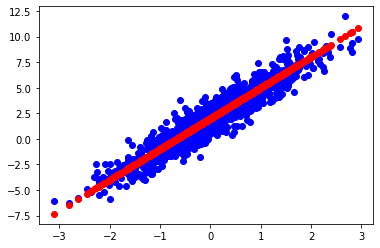

In [90]:
# 실제 선형 회귀식 y = 3X + 2 라는 직선과 현재 데이터가 얼마나 차이가 있는지 확인

# plot을 그리는 라이브러리
import matplotlib.pyplot as plt

# x, y간의 관계를 그려보겠다.
# 파란색 점은 빨간색 선을 예측하고자하는 학습 데이터 
plt.scatter(x, y, c = 'b')

# 빨간색 선은 실제 우리가 찾고자 하는 직선
plt.scatter(x, 3 * x + 2, c = 'r')
plt.show()

# 3. 모델 정의

- $\hat{y} \ =\  w * x \  +\  b$ 의 식을 tensorflow로 구현하였다.

- 실제 값은 W = 3, b = 2인 직선


- 이후 미분값을 통한 가중치 계산시 반드시 변수들은 float type 이어야 한다.


- 초기값을 w, b 각각 10, 0으로 주었다.

In [96]:
# 학습할 모델을 정의
class LinearModel(tf.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # 가중치 W, 바이어스b 변수 텐서를 정의 
        # 이미 우리가 x,y의 shape를 이미 알고 있기 때문에 
        
        # 초기값을 정해야합니다. -> 단일 값 텐서를 정의하였다. 
        # 입력 텐서도 단일 값이기 때문에 
        
        # 실제값 3으로 가까워질 텐서
        self.w = tf.Variable(44, dtype = tf.float32, name = 'w')
        
        # 실제값 2와 가까워질 텐서
        self.b = tf.Variable(1, dtype = tf.float32, name = 'b')
    
    def __call__(self, x):
        
        # 연산과정을 
        
        y = self.w *  x + self.b
        
        return y
        

In [97]:
# 위의 모델은 y = wx + b라는 가설을 통해 최종적으로 y = 3x + 2라는 직선에 가까워질 것입니다.

my_linear_model = LinearModel()

In [98]:
my_linear_model.trainable_variables

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'w:0' shape=() dtype=float32, numpy=44.0>)

# 4. 손실 함수 정의

손실 함수란  $y - \hat{y}$, 실제 값과 모델이 예측한 값의 차이이다.
  
<img src="./education_images/1-1-7_formula.png" alt="Drawing" style="width: 300px;"/>

In [94]:
# 두 직선간의 거리를 의미하는 손실함수를 정의합니다.
# y는 실제 데이터, y_hat은 모델이 예측한 값
def loss(y, y_hat):
    
    # reduce_mean -> reducer function이란, 텐서의 크기에 관계없이 단일값을 나오는 함수
    # 텐서의 모든 값의 평균값을 반환하는 함수
    
    loss_value = tf.reduce_mean(tf.square(y - y_hat))
    
    return loss_value
    

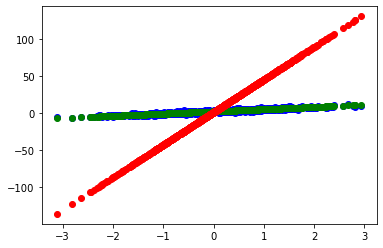

In [101]:
# 현재 초기화된 가중치 값과 실제 값의 차이

# 산포도를 작성

# 파란색 점은 학습 데이터
plt.scatter(x, y, c = 'b')


plt.scatter(x, 3 * x + 2, c = 'green')
plt.scatter(x, my_linear_model(x), c = 'r')

plt.show()

In [103]:
# 실제 값과 현재 모델 간의 차이를 loss라고 하는데 현재 모델의 loss 계산

# y는 실제 값, my_linear_model(x)는 현재 모델이 예측한 값
print(loss(y, my_linear_model(x)).numpy())

# 학습이 진행됨에 따라 loss 즉, 모델과 참값 간의 차이가 줄어들어야 하기 때문에 loss도 줄어들 것이다.

1664.3293


# 5. 학습 루프 정의

학습 과정은 아래와 같다.

1. 모델을 통해 각 batch 마다 예측값 $\hat{y}$ 구한다.


2. 사전에 정의해둔 loss function을 통해 loss를 구한다.


3. 자동미분을 수행하는 GradientTape를 통해 gradient를 구한다.


4. optimizer를 통해 가중치를 갱신한다.

예측한 값과 실제 값의 차이를 loss라고 한다. loss가 클수록 예측한 값과의 차이가 컸다는 의미가 된다.


<img src="./education_images/formula_app.png" alt="Drawing" style="width: 500px;"/>


값의 차이만큼 실제 b, w 쪽으로 이동시키겠다는 의미이다.

In [104]:
my_linear_model.trainable_variables 

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'w:0' shape=() dtype=float32, numpy=44.0>)

In [109]:
# 학습 루프 정의

# model은 학습할 모델

# x, y 는 학습 데이터

# learning rate - 가중치의 갱신을 얼마나 크게 반영할 것인가 
def train(model, x, y, learning_rate):
    
     # loss_value 즉, 손실 값의 미분값을 구해야합니다. 
    # 이전에 미분 값을 추적하는 객체 GradientTape를 사용
    with tf.GradientTape(persistent = True) as t : 
        # loss를 구해야한다.
        y_hat = model(x)

        # 현재 모델과 실제 값 간의 차이를 구했습니다.
        loss_value = loss(y, y_hat)
    

    # 현재 모델의 b, w 텐서의 값
    b, w = model.trainable_variables 
    
    # b에대한 loss의 미분값
    db = t.gradient(loss_value, b)
    
    # w에 대한 loss의 미분값
    dw = t.gradient(loss_value, w)
    
    # b = b- db * learning_rate
    b.assign_sub( db * learning_rate)
    
     # w = w- dw * learning_rate
    w.assign_sub( dw * learning_rate)

# 6. 학습 루프를 진행하며 결과 평가

In [110]:
# 학습을 몇번 돌 것이냐 총 30번 돌겠다.
epochs = range(30)

# epochs는 0 ~ 29까지의 값을 가지는 LIST가 된다.
epochs

range(0, 30)

In [120]:
# 학습 루프를 정의하였다. 
# 학습 루프의 경우, 진행하면서 가중치가 갱신된다.

# 학습을 몇번 돌 것이냐 총 30번 돌겠다.
epochs = range(30)


# 매 학습마다 w, b를 저장할 리스트를 정의
w_list = []
b_list = []

# 학습 데이터를 넣어서 위의 학습 루프를 진행한다.
def training_loop(model, x, y):
    
    for epoch in epochs:
            # 학습을 총 30회 진행한다.
            train(model, x, y, 0.1)
            
            w = model.w
            b = model.b
            
            # 실제로 W, b 가 학습을 하면서 3, 2로 가까워지는가?
            b_list.append(b)
            w_list.append(w)
            
            
            # 학습을 진행한 후의 loss -> 실제로 loss가 학습하면서 계속 감소하고 있는가?
            loss_value = loss(y, model(x))
            print('현재 loss는 ', loss_value.numpy())

In [121]:
# 기존의 모델을 생성
my_linear_model = LinearModel()

# 학습을 진행
training_loop(my_linear_model, x, y)


현재 loss는  1073.0856
현재 loss는  692.3515
현재 loss는  447.04892
현재 loss는  288.92163
현재 loss는  186.93724
현재 loss는  121.12892
현재 loss는  78.642876
현재 loss는  51.20012
현재 loss는  33.465492
현재 loss는  21.999079
현재 loss는  14.581865
현재 loss는  9.781672
현재 loss는  6.673692
현재 loss는  4.660449
현재 loss는  3.3557565
현재 loss는  2.5098693
현재 loss는  1.9612082
현재 loss는  1.6051838
현재 loss는  1.3740652
현재 loss는  1.22397
현재 loss는  1.1264552
현재 loss는  1.0630765
현재 loss는  1.0218688
현재 loss는  0.99506617
현재 loss는  0.9776267
현재 loss는  0.9662758
현재 loss는  0.958885
현재 loss는  0.9540712
현재 loss는  0.95093507
현재 loss는  0.9488908


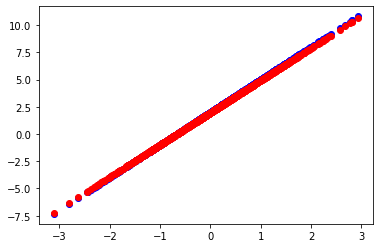

In [122]:
# W, B가 얼마나 3, 2에 가까워졌는가 

# 실제 3X + 2의 함수 식
plt.scatter(x, 3*x + 2, c = 'b')

# 우리 모델이 예측한 값
plt.scatter(x, my_linear_model(x), c = 'r')


plt.show()

In [123]:
my_linear_model.trainable_variables

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=1.9581527>,
 <tf.Variable 'w:0' shape=() dtype=float32, numpy=2.9563372>)

### `batch`

1회의 학습루프에 사용할 학습 데이터의 크기


### `epoch`

전체 학습 데이터에 대해서 진행할 학습의 횟수를 의미한다.


- 위에서 epoch는 30으로, 총 30번의 학습 루프를 진행하였다. 또한 학습 루프 내에서 학습 데이터로 batch로 분할하여 예측값을 구하고 가중치를 갱신하는데, 이 과정을 1회만 수행하였기 때문에 1 batch 내에 학습데이터를 모두 사용한 것이다. 즉 batch는 1000이 된다. 


- 학습루프를 진행하면서 변수로 정의되어있는 w, b 의 값이 각각 3, 1로 수렴하고 있음을 볼 수 있으며 loss 또한 지속적으로 낮아지는 것을 확인할 수 있다. w, b 값의 변화를 plot을 통해 시각화하여보고, 우리의 회귀선이 데이터에 적합한지도 시각화하여보자. 

# 가중치 저장하기

지금까지 tensorflow로 구현한 모든 layer, model이 `tf.Module` 의  하위클래스로 구현됨을 보았다. 우리가 학습된 모델을 저장하고 싶을 때, 학습과정마다 모델을 저장하고자 할 때 `tf.train.Checkpoint()`를 사용하여 가중치를 저장한다. 저장하는 방법은 아래와 같다.


1. `checkpoint` 객체를 생성하여 현재 모델의 상태를 저장한다.


2. `checkpoint.save`를 통해서 디렉토리에 저장한다.
    -  저장되는 객체는  
        `<model명>-<save counter 수>.data-00000-of-00001`  
        →  변수 값과 실제 데이터
        
       `<model명>-<save counter 수>.index`  
        →  저장된 항목과 체크포인트의 번호를 추적하는 메타 데이터
        
- 코드가 실행되는 디렉토리의 하위디렉토리로 가중치 및 데이터들이 저장된다.

- 새로운 모델을 생성하게 되면 가중치의 값이 모델을 선언했을 때의 초기값을 가진다.

- 새로운 모델에 대해서 미리 저장된 가중치를 적용하기 위해서는 새로운 모델에 대해서 _checkpoint_ 를 생성한 뒤, 저장된 가중치를 `restore` 를 통해서 불러온다. 

- 이외에 모델 객체를 저장하는 방법이 존재하지만 대부분의 레퍼런스, 기존의 모델들의 경우, keras를 통해 사용되기 때문에 keras API에서 다루려고 한다.